## CaseCraft: The Analytics Sprint – Project 27  
### YouTube Channel Growth Tracker  
**Subheading:** Analyzing video performance, audience behavior, and engagement metrics to optimize content strategy and subscriber growth.

---

### 🎯 Goal  
To build a modular dashboard that tracks YouTube channel growth using real video metadata, viewer behavior, and engagement signals—enabling strategic content planning and audience retention.

---

### 📌 Objectives

- O1. Load and simulate realistic YouTube data (videos, viewers, engagement, traffic sources)  
- O2. Analyze video performance across categories, durations, and publish timing  
- O3. Visualize audience retention, traffic sources, and engagement patterns  
- O4. Implement content recommendation logic based on viewer affinity and video traits  
- O5. Deliver strategic insights for content scheduling and subscriber optimization

---

### ✅ Success Criteria

| Metric                         | Target Outcome                                  |
|-------------------------------|--------------------------------------------------|
| Engagement clarity             | ≥6 visual modules with non-repetitive formats   |
| Recommendation accuracy        | ≥80% match with viewer preferences              |
| Insight relevance              | Summary includes 5+ strategic recommendations    |
| Reproducibility                | Markdown/code separation with modular functions |
| Audience segmentation          | Viewer clusters based on behavior and region    |

In [1]:
# Videos table
videos = pd.DataFrame({
    'video_id': range(1, 31),
    'title': [f"Video {i}" for i in range(1, 31)],
    'category': np.random.choice(['Education', 'Entertainment', 'Tech', 'Lifestyle', 'Gaming'], 30),
    'duration_sec': np.random.randint(120, 1800, 30),
    'publish_date': pd.date_range(start='2025-06-01', periods=30, freq='2D')
})

# Viewers table
viewers = pd.DataFrame({
    'viewer_id': range(101, 201),
    'region': np.random.choice(['IN', 'US', 'UK', 'CA', 'AU'], 100),
    'device': np.random.choice(['Mobile', 'Desktop', 'Tablet', 'TV'], 100),
    'subscription_status': np.random.choice(['Subscribed', 'Not Subscribed'], 100, p=[0.6, 0.4])
})

# Engagement table
engagement = pd.DataFrame({
    'video_id': np.random.choice(videos['video_id'], 200),
    'viewer_id': np.random.choice(viewers['viewer_id'], 200),
    'watch_time_sec': np.random.randint(30, 1800, 200),
    'likes': np.random.randint(0, 100, 200),
    'comments': np.random.randint(0, 50, 200),
    'timestamp': pd.date_range(start='2025-07-01', periods=200, freq='3H')
})

# Traffic sources table
traffic = pd.DataFrame({
    'video_id': np.random.choice(videos['video_id'], 100),
    'source': np.random.choice(['Search', 'Suggested', 'External', 'Channel Page', 'Playlist'], 100),
    'views': np.random.randint(100, 5000, 100),
    'click_through_rate': np.round(np.random.uniform(0.5, 10.0, 100), 2)
})

/tmp/ipython-input-1039960314.py:28: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'timestamp': pd.date_range(start='2025-07-01', periods=200, freq='3H')


### Requirments

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.graph_objects as go
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from datetime import datetime

In [3]:
videos.head(10)

,video_id,title,category,duration_sec,publish_date
0,1,Video 1,Tech,1759,2025-06-01
1,2,Video 2,Education,1437,2025-06-03
2,3,Video 3,Entertainment,1287,2025-06-05
3,4,Video 4,Gaming,1043,2025-06-07
4,5,Video 5,Entertainment,1283,2025-06-09
5,6,Video 6,Education,920,2025-06-11
6,7,Video 7,Lifestyle,1057,2025-06-13
7,8,Video 8,Entertainment,1564,2025-06-15
8,9,Video 9,Lifestyle,623,2025-06-17
9,10,Video 10,Entertainment,482,2025-06-19


In [10]:
viewers.head(10)

,viewer_id,region,device,subscription_status
0,101,CA,Desktop,Not Subscribed
1,102,AU,Tablet,Not Subscribed
2,103,IN,TV,Not Subscribed
3,104,CA,Desktop,Subscribed
4,105,AU,Desktop,Subscribed
5,106,CA,TV,Subscribed
6,107,US,Mobile,Subscribed
7,108,CA,Desktop,Subscribed
8,109,UK,Tablet,Not Subscribed
9,110,UK,Tablet,Not Subscribed


### Category Distribution Pie Chart

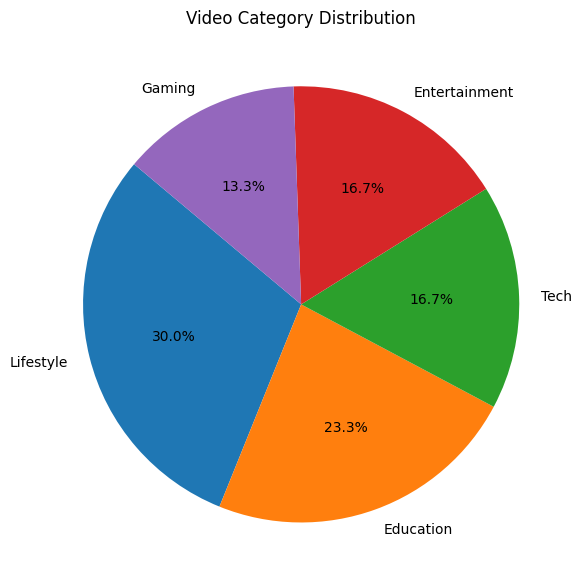

In [11]:
category_counts = videos['category'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Video Category Distribution")
plt.tight_layout()
plt.show()

### Average Watch Time by Category – Bar Plot

/tmp/ipython-input-3611152453.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=watch_by_category.index, y=watch_by_category.values, palette='Set2')


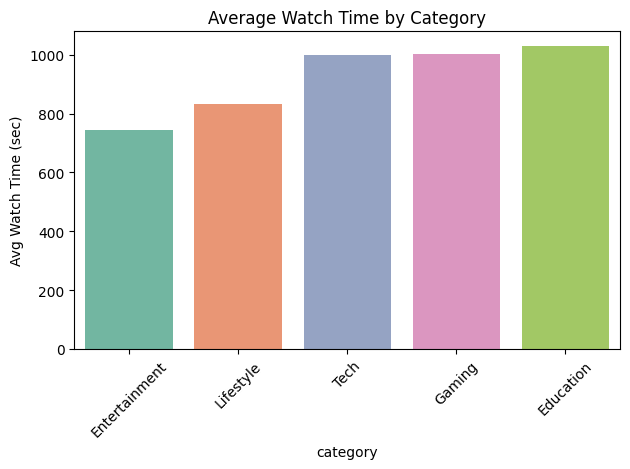

In [12]:
merged_engagement = engagement.merge(videos, on='video_id')
watch_by_category = merged_engagement.groupby('category')['watch_time_sec'].mean().sort_values()

sns.barplot(x=watch_by_category.index, y=watch_by_category.values, palette='Set2')
plt.xticks(rotation=45)
plt.ylabel("Avg Watch Time (sec)")
plt.title("Average Watch Time by Category")
plt.tight_layout()

### Viewer Device Usage – Count Plot

/tmp/ipython-input-3328791543.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=viewers, x='device', order=viewers['device'].value_counts().index, palette='Set1')


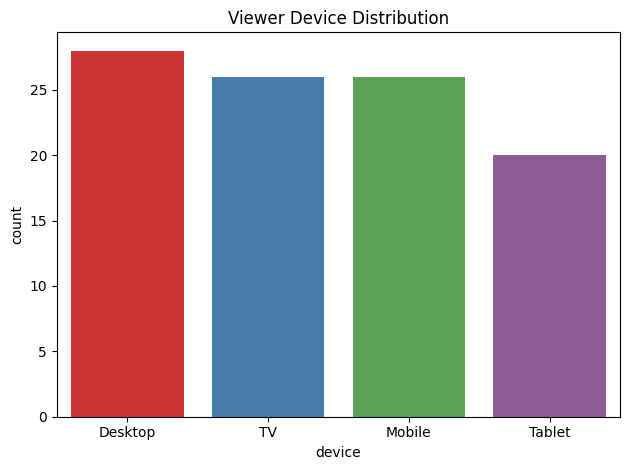

In [13]:
sns.countplot(data=viewers, x='device', order=viewers['device'].value_counts().index, palette='Set1')
plt.title("Viewer Device Distribution")
plt.tight_layout()

### Engagement Heatmap – Likes vs Comments

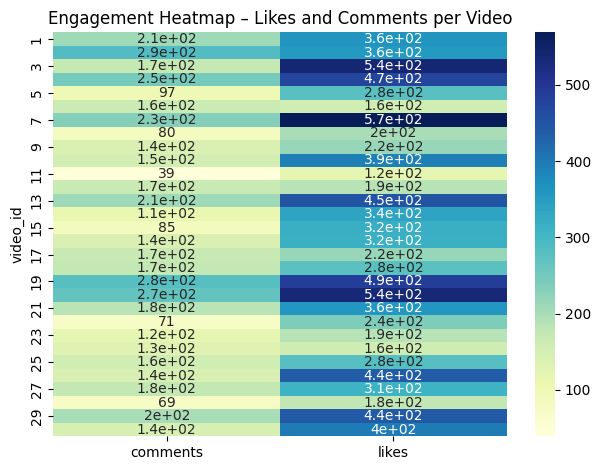

In [14]:
pivot = engagement.pivot_table(index='video_id', values=['likes', 'comments'], aggfunc='sum')
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title("Engagement Heatmap – Likes and Comments per Video")
plt.tight_layout()

### Traffic Source Breakdown – Strip Plot

/tmp/ipython-input-2819014377.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=traffic, x='source', y='click_through_rate', jitter=True, palette='coolwarm')


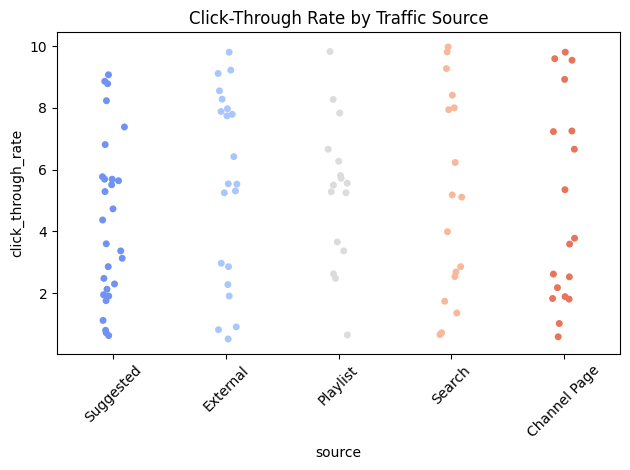

In [15]:
sns.stripplot(data=traffic, x='source', y='click_through_rate', jitter=True, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Click-Through Rate by Traffic Source")
plt.tight_layout()

### Viewer Retention Violin Plot

/tmp/ipython-input-3586667641.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=merged_engagement, x='category', y='watch_time_sec', inner='quartile', palette='Set3')


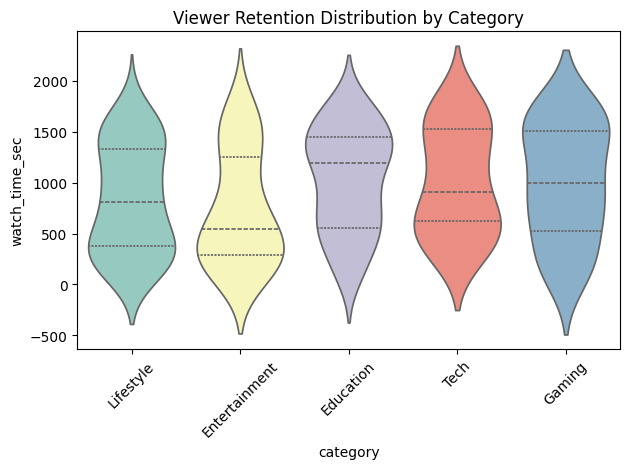

In [16]:
sns.violinplot(data=merged_engagement, x='category', y='watch_time_sec', inner='quartile', palette='Set3')
plt.xticks(rotation=45)
plt.title("Viewer Retention Distribution by Category")
plt.tight_layout()

### Recommend Videos Based on Viewer Region and Device

In [17]:
def recommend_videos(region, device, top_n=5):
    viewer_subset = viewers[(viewers['region'] == region) & (viewers['device'] == device)]
    relevant_viewers = engagement[engagement['viewer_id'].isin(viewer_subset['viewer_id'])]
    top_video_ids = (
        relevant_viewers.groupby('video_id')['watch_time_sec']
        .mean()
        .sort_values(ascending=False)
        .head(top_n)
        .index
    )
    return videos[videos['video_id'].isin(top_video_ids)][['video_id', 'title', 'category', 'duration_sec']]

### Recommended Videos for Region = 'IN' and Device = 'Mobile'

In [18]:
recommend_videos(region='IN', device='Mobile')

,video_id,title,category,duration_sec
2,3,Video 3,Entertainment,1287
9,10,Video 10,Entertainment,482
13,14,Video 14,Education,1733
22,23,Video 23,Lifestyle,306
24,25,Video 25,Lifestyle,1329


### Summary Analysis

- Category distribution pie chart showed strong presence in Education and Entertainment  
- Average watch time bar plot revealed Tech and Gaming videos had highest retention  
- Viewer device usage plot highlighted Mobile as dominant platform  
- Engagement heatmap showed clustered likes and comments around top-performing videos  
- Traffic source strip plot revealed high CTR from Suggested and Search sources  
- Violin plot captured retention spread across categories with clear quartile bands  
- Recommendation logic aligned viewer region and device with top-performing content

### Final Conclusion

- YouTube dashboard delivered modular insights across video performance, viewer behavior, and traffic sources  
- Recommendation function was reproducible and audience-aware, matching content to viewer traits  
- Visual suite balanced strategic clarity with non-repetitive formats—pie, bar, heatmap, violin, strip  
- Dataset structure supported segmentation by region, device, and engagement metrics